# Metropolis sampling 

In [1]:
def unnormalized_beta(alpha, beta):
    def beta_f(x):
        if x < 0:
            return 0
        if x >1:
            return 0
        return x**(alpha-1) * (1-x)**(beta - 1)
    return beta_f

In [18]:
import numpy as np
def metropolis_sampler_base(
    unnormalized_pdf=unnormalized_beta(2, 3), 
    n_sample=100, x_0=0.5
):
    '''
    Sample from an unnormalized distribution with the Metropolis Algorihm
    Args: 
        unnormalized_pdf: the unnormalized pdf we want to sample from 
        n_sample: the size of the sample to output
        x_0: the starting point of the algo
    '''
    x = x_0
    sample = [x]
    for _ in range(n_sample):
        x_prop = np.random.normal(loc=x)
        unif = np.random.uniform()
        acceptance_ratio = unnormalized_pdf(x_prop)/unnormalized_pdf(x)
        if acceptance_ratio > unif:
            x = x_prop
        sample.append(x)
    return sample

def metropolis_sampler_faster(unnormalized_pdf=unnormalized_beta(2, 3), n_sample=100, x_0=0.5):
    '''
    Metropolis sampler, faster than the first version
    because all the random number are generated before the for loop
    Args: 
        unnormalized_pdf: the unnormalized pdf we want to sample from 
        n_sample: the size of the sample to output
        x_0: the starting point of the algo
    Possible things to improve:
    directly provide the acceptance ratio instead of having to compute the 
    ratio every time
    '''
    x= x_0
    sample = [x]
    random_numbers = np.random.normal(size=n_sample)
    unif_nums = np.random.uniform(size=n_sample)
    for rnum, unif in zip(random_numbers, unif_nums):
        x_prop = x + rnum
        acceptance_ratio = unnormalized_pdf(x_prop)/unnormalized_pdf(x)
        if acceptance_ratio > unif:
            x = x_prop
        sample.append(x)
    return sample

In [19]:
%timeit metropolis_sampler_faster(n_sample=10**5)
%timeit metropolis_sampler_base(n_sample=10**5)

463 ms ± 36 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
803 ms ± 83.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


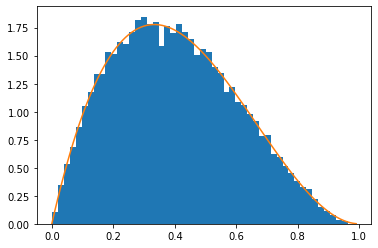

In [20]:
import pylab as plt
%matplotlib inline
beta_sample = metropolis_sampler_base(n_sample=10**5)
plt.hist(beta_sample, bins=50, density=True);
x = np.arange(0,1,0.01)
plt.plot(x, x*(1-x)**2*12)

# Metropolis-Hastings sampling

In [23]:
def metropolis_sampler_with_exponential(
    unnormalized_pdf=unnormalized_beta(2, 3), 
    n_sample=100,
    x_0=0.5,
    only_metropolis=False
):
    '''
    When the detailed balance principle is not verified, we need to add a correction 
    term to take that into account
    Args: 
        unnormalized_pdf: the unnormalized pdf we want to sample from 
        n_sample: the size of the sample to output
        x_0: the starting point of the algo
        with_correction: add the correction term to the acceptance ration or not  
    '''
    x = x_0
    sample = [x]
    for _ in range(n_sample):
        x_prop = np.random.exponential(scale=x)
        unif = np.random.uniform()
        if x_prop:
            x_trans =  x/x_prop - x_prop/x 
            correction = np.exp(-x_trans) * x/x_prop
        if only_metropolis:
            correction = 1
        acceptance_ratio = unnormalized_pdf(x_prop)/unnormalized_pdf(x) * correction
        if acceptance_ratio > unif:
            x = x_prop
        sample.append(x)
    return sample

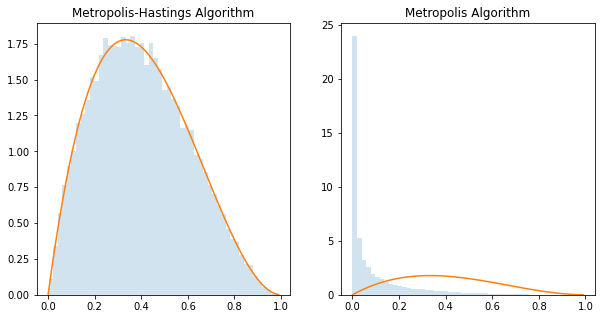

In [22]:
x = np.arange(0,1,0.01)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
beta_sample = metropolis_sampler_with_exponential(n_sample=10**5)
plt.hist(beta_sample, bins=50, density=True, alpha=0.2);
plt.title('Metropolis-Hastings Algorithm')
plt.plot(x, x*(1-x)**2*12)

plt.subplot(1, 2, 2)
beta_sample_no_correc = metropolis_sampler_with_exponential(n_sample=10**5, only_metropolis=True)
plt.hist(beta_sample_no_correc, bins=50, density=True, alpha=0.2);
plt.title('Metropolis Algorithm')
plt.plot(x, x*(1-x)**2*12)